In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ace_tools as tools

In [48]:


# Load the red wine dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(red_wine_url, sep=';')

# Load the white wine dataset
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine = pd.read_csv(white_wine_url, sep=';')

# Display the first few rows of both datasets
print("Red Wine Dataset:")
display(red_wine.head())

print("\nWhite Wine Dataset:")
display(white_wine.head())

# Display basic dataset info
print("\nRed Wine Dataset Info:")
red_wine.info()

print("\nWhite Wine Dataset Info:")
white_wine.info()

Red Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



White Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Da

#### 1. Data Preprocessing
Retrieve the dataset (see hints below).

Normalize the dataset to ensure all features are on the same scale

In [50]:
# Add a color feature to differentiate between red and white wines
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# Combine both datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

# Check for missing values
print("Missing values in dataset:")
print(wine_data.isnull().sum())

# Separate features and target
X = wine_data.drop(columns=['quality', 'color'])  # Remove target and categorical column
y = wine_data['quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of normalized data
print("\nNormalized Feature Data:")
display(X_scaled_df.head())

Missing values in dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Normalized Feature Data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


### 2. Dimensionality Reduction & Visualization
Apply PCA to reduce the dataset to 2 or 3 principal components.

Visualize the transformed data using scatter plots (2D and 3D).

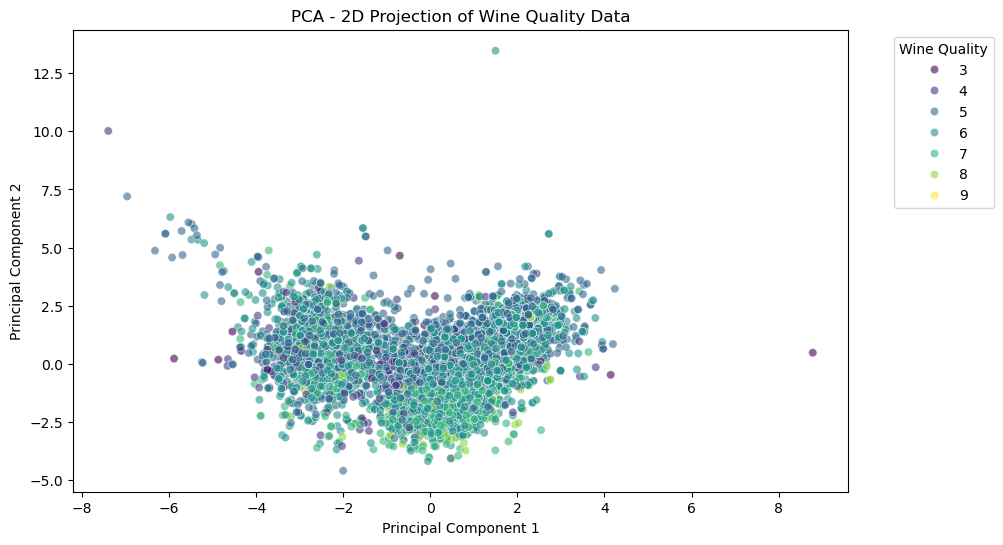

In [52]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Convert PCA results to DataFrame
pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df['quality'] = y  # Add quality labels for visualization

# Scatter plot for 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_2d_df['quality'], palette='viridis', data=pca_2d_df, alpha=0.6)
plt.title('PCA - 2D Projection of Wine Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


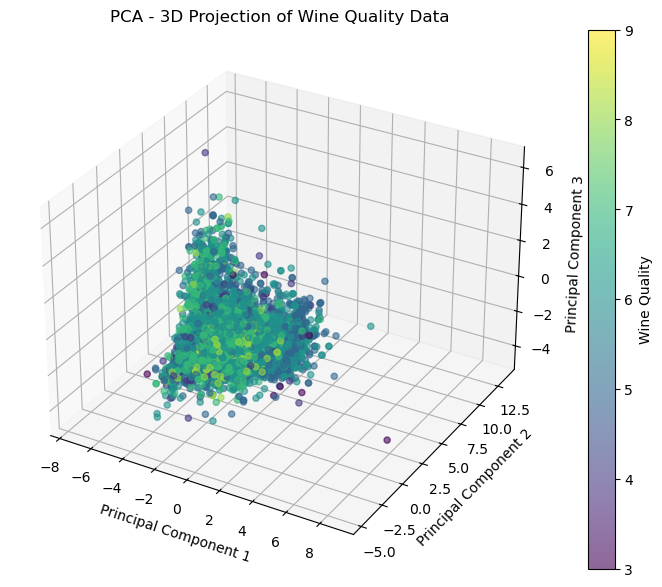

In [53]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Convert PCA results to DataFrame
pca_3d_df = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['quality'] = y  # Add quality labels for visualization

# 3D scatter plot for PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'], c=pca_3d_df['quality'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Projection of Wine Quality Data')
plt.colorbar(scatter, label='Wine Quality')
plt.show()

Identify the variance explained by each principal component and discuss the
trade-off between dimensionality reduction and information loss

Dimensionality Reduction (DR): PCA reduces the number of features while retaining the most important variance in the data.

Information Loss (IL): As the number of components decreases, some variance is lost, which may impact model performance.


Explained Variance Ratio for Each Principal Component:
   Principal Component  Explained Variance Ratio
0                  PC1                  0.275443
1                  PC2                  0.226711
2                  PC3                  0.141486
3                  PC4                  0.088232
4                  PC5                  0.065443
5                  PC6                  0.055210
6                  PC7                  0.047560
7                  PC8                  0.045592
8                  PC9                  0.030639
9                 PC10                  0.020700
10                PC11                  0.002985


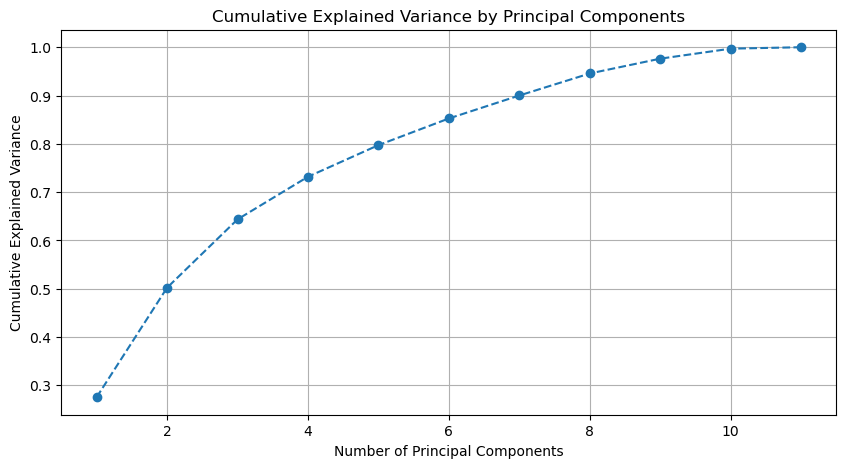

In [55]:
# Compute explained variance ratio for all principal components
pca_full = PCA(n_components=X.shape[1])
X_pca_full = pca_full.fit_transform(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# Create a DataFrame for explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})

# Display the explained variance
print("\nExplained Variance Ratio for Each Principal Component:")
print(explained_variance_df)

# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

The principal component analysis (PCA) results show that PC1 and PC2 together explain 50% of the variance, while PC1 to PC4 capture around 73%, and PC1 to PC6 account for 85% of the total variance. Retaining all 11 components preserves 100% of the variance, but doing so does not reduce dimensionality or improve efficiency. The cumulative variance plot suggests that using 4 to 6 components strikes a good balance between maintaining essential information and reducing computational complexity. If visualization is the goal, 2 or 3 components may suffice, but with significant information loss.

The trade-off between dimensionality reduction and information loss depends on the application. Keeping fewer components improves computational efficiency and removes noise but may omit valuable patterns. Retaining more components ensures higher accuracy but increases model complexity. An optimal choice would be PC1–PC6 (85% variance) for predictive modeling and PC1–PC4 (73% variance) for general analysis, ensuring most critical features remain intact while simplifying the dataset.

### 3. Comparison with t-SNE
Apply t-SNE on the dataset to obtain a 2D representation.

Compare the results with PCA in terms of interpretability and clustering.

Discuss how PCA and t-SNE handle high-dimensional data differently

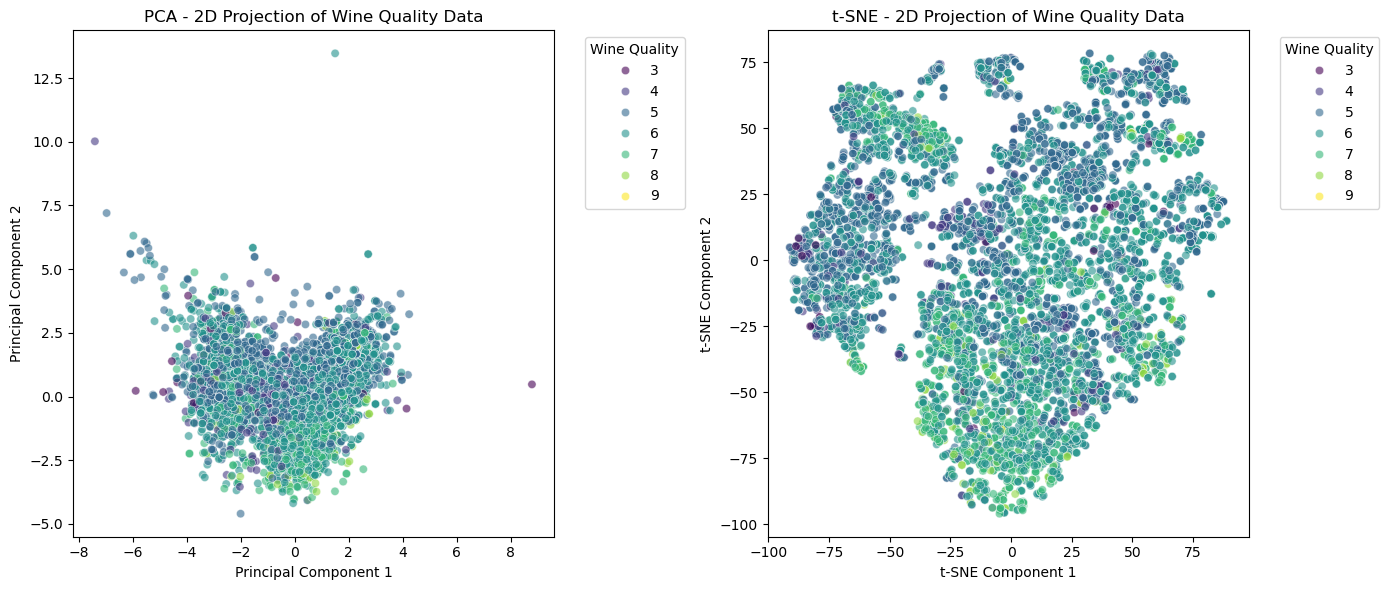

In [58]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Apply t-SNE for 2D representation
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne_2d = tsne.fit_transform(X_scaled)

# Convert results to DataFrames
pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df['quality'] = y

tsne_2d_df = pd.DataFrame(X_tsne_2d, columns=['t-SNE1', 't-SNE2'])
tsne_2d_df['quality'] = y

# Create a side-by-side comparison of PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Scatter Plot
sns.scatterplot(x='PC1', y='PC2', hue=pca_2d_df['quality'], palette='viridis', data=pca_2d_df, alpha=0.6, ax=axes[0])
axes[0].set_title('PCA - 2D Projection of Wine Quality Data')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

# t-SNE Scatter Plot
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=tsne_2d_df['quality'], palette='viridis', data=tsne_2d_df, alpha=0.6, ax=axes[1])
axes[1].set_title('t-SNE - 2D Projection of Wine Quality Data')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The PCA plot (left) shows a linear transformation of the data, preserving the global structure while reducing dimensionality. The points are spread out based on variance, but no clear clusters are visible. This is because PCA is a linear method, meaning it does not separate complex, nonlinear relationships effectively. The data points overlap significantly, indicating that PCA may not be the best choice for visualizing distinct clusters in this dataset.

On the other hand, the t-SNE plot (right) presents a nonlinear transformation that effectively groups similar data points together. Unlike PCA, t-SNE is designed for local structure preservation, meaning it excels at separating points into meaningful clusters. In this case, wine samples with similar quality scores appear to be forming groups, which makes t-SNE better for identifying hidden patterns and subgroups in high-dimensional data. However, the axes in t-SNE have no clear interpretation, making it less useful for understanding feature relationships.

# A BRIEF REPORT

# **Comparison of PCA and t-SNE for Dimensionality Reduction**

## **1. Trade-offs Between PCA and t-SNE**
### **Principal Component Analysis (PCA)**
- PCA is a **linear transformation technique** that preserves **global variance** in high-dimensional data.
- It helps in **feature selection and reducing dimensionality** while maintaining interpretability.
- The explained variance ratio allows us to **quantify how much information is retained** with fewer dimensions.
- However, PCA **does not work well for nonlinear relationships** and often fails to separate distinct clusters.

### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
- t-SNE is a **nonlinear transformation** that excels at **clustering similar data points together**.
- It **preserves local structures** effectively, revealing patterns that PCA might miss.
- Unlike PCA, **t-SNE does not retain the original feature relationships**, making it difficult to interpret.
- Computationally more expensive than PCA and can **give different results on each run** due to random initialization.

### **Key Trade-offs**
| Feature | PCA | t-SNE |
|---------|-----|------|
| **Type of Transformation** | Linear | Nonlinear |
| **Interpretability** | High | Low |
| **Structure Preserved** | Global | Local |
| **Cluster Separation** | Poor | Strong |
| **Computational Cost** | Low | High |
| **Usage** | Feature selection, preprocessing | Data visualization, clustering |

---

## **2. Key Observations from the Visualizations**
### **PCA Visualization (2D Projection)**
- The PCA scatter plot showed **no distinct clusters**, as it spreads the data based on variance.
- It preserves the **global structure** but **overlaps samples with different quality scores**.
- Since PCA is a linear transformation, it does not capture **nonlinear relationships** in the wine quality dataset.

### **t-SNE Visualization (2D Projection)**
- The t-SNE plot revealed **clearer groupings**, suggesting hidden clusters in the dataset.
- Similar wine quality scores were more **closely packed**, indicating **better local structure preservation**.
- However, t-SNE’s axes have **no direct meaning**, making it less useful for feature-based interpretation.

### **Dimensionality Reduction vs. Information Loss**
- From the **explained variance ratio** in PCA, **PC1 to PC6** captured **85% of the variance**, making it a good balance between **dimensionality reduction and accuracy**.
- t-SNE does not have a direct measure like variance explained but is **better for clustering and exploratory analysis**.

---

## **3. Conclusion**
- **PCA is better suited for feature selection and understanding data variance**, making it useful for predictive modeling.
- **t-SNE is ideal for visualizing hidden structures** in high-dimensional datasets but is computationally expensive.
- The choice between PCA and t-SNE depends on the **goal of the analysis**:
  - Use **PCA for dimensionality reduction before modeling**.
  - Use **t-SNE for visualization and clustering insights**.
